In [5]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'
    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
else:
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [7]:
import pandas as pd
import numpy as np
from matplotlib import pylab as plt

from sklearn import model_selection,preprocessing

from ClassPerceptron import Perceptron

In [8]:
# Leer el archivo
datos = pd.read_csv(DATOS_DIR + "Drug5.csv")
nColum = list(datos.columns.values)

#-- ordinales a numericos ---
mapeo = {'Sex': {'F':1, 'M':0},
          'BP':{'HIGH':2, 'NORMAL':1, 'LOW':0},
          'Cholesterol':{'NORMAL':0, 'HIGH':1}}

datos.replace(mapeo, inplace=True)
datos

C:\Users\W10\AppData\Local\Temp\ipykernel_17108\447857206.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos.replace(mapeo, inplace=True)


,Age,Sex,BP,Cholesterol,Na,K,Drug
0,23,1,2,1,0.792535,0.031258,drugY
1,47,0,0,1,0.739309,0.056468,drugC
2,47,0,0,1,0.697269,0.068944,drugC
3,28,1,1,1,0.563682,0.072289,drugX
4,61,1,0,1,0.559294,0.030998,drugY
...,...,...,...,...,...,...,...
195,56,1,0,1,0.848774,0.073380,drugC
196,16,0,0,1,0.743021,0.061886,drugC
197,52,0,1,1,0.549945,0.055581,drugX
198,23,0,1,0,0.784520,0.055959,drugX


In [5]:
#--- DATOS DE ENTRENAMIENTO ---
X = np.array(datos.iloc[:,:-1])
T = np.array((datos['Drug'] == 'drugY') * 1)
nColum = ['Otra', 'drugY']

#--- CONJUNTOS DE ENTRENAMIENTO Y TESTEO ---
X_train, X_test, T_train, T_test = model_selection.train_test_split(
        X, T, test_size=0.30, random_state=42)

normalizarEntrada = 1  # 1 si normaliza; 0 si no
if normalizarEntrada:
    #--- Normalización lineal entre 0 y 1 ---
    normalizador = preprocessing.MinMaxScaler()

    # Normaliza utilizando la media y el desvio
    # normalizador= preprocessing.StandardScaler()
    
    X_train = normalizador.fit_transform(X_train)
    X_test  = normalizador.transform(X_test)

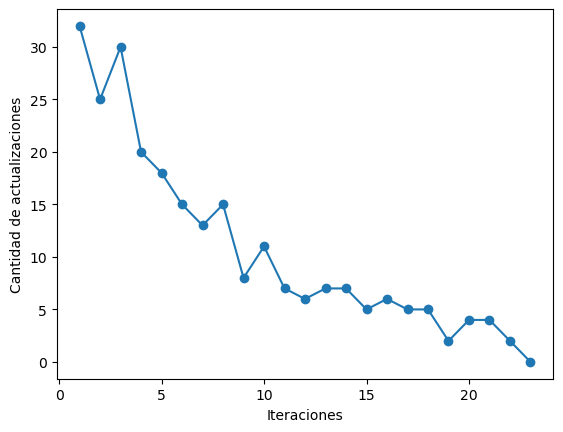

In [6]:
ppn = Perceptron(alpha=0.01, n_iter=650, random_state=None)
ppn.fit(X_train, T_train)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()

In [10]:
Y_test = ppn.predict(X_test)

aciertos = sum(Y_test == T_test)
print("aciertos = ", aciertos)

nAciertos = sum(Y_test == T_test)
print("%% de aciertos = %.2f %%" % (100*nAciertos/X_test.shape[0]))


aciertos =  58
% de aciertos = 96.67 %


In [13]:
normalizador.data_min_

array([15.      ,  0.      ,  0.      ,  0.      ,  0.501956,  0.020022])

In [15]:
normalizador.data_max_

array([74.      ,  1.      ,  2.      ,  1.      ,  0.896056,  0.078906])